<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/notebook_2023/Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
from PIL import ImageOps
import matplotlib.pyplot as plt

In [2]:
import numpy as np

## 1. Global Histogram Equalization

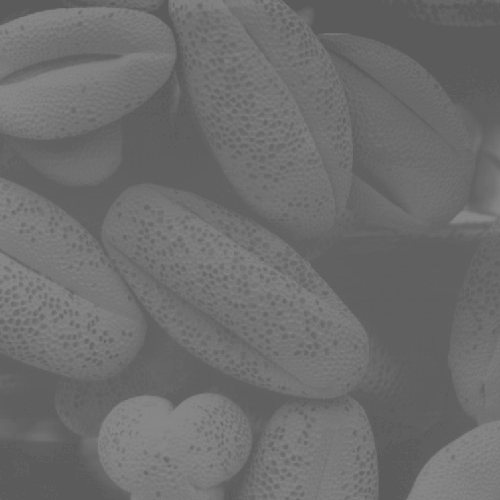

In [3]:
I = Image.open('pollen-lowcontrast.tif')
I

In [4]:
print(I.size)
N = np.prod(I.size)
print(N)

(500, 500)
250000


In [5]:
hist = I.histogram()
#print(hist)

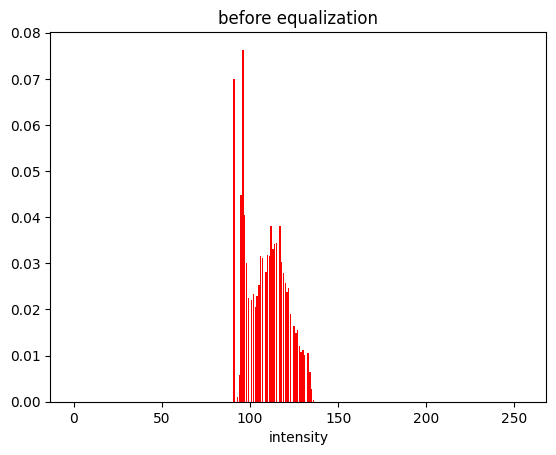

In [6]:
for n in range(0,len(hist)):
  plt.bar(n,hist[n]/N,color='r')

plt.title('before equalization')
plt.xlabel('intensity')
plt.show()

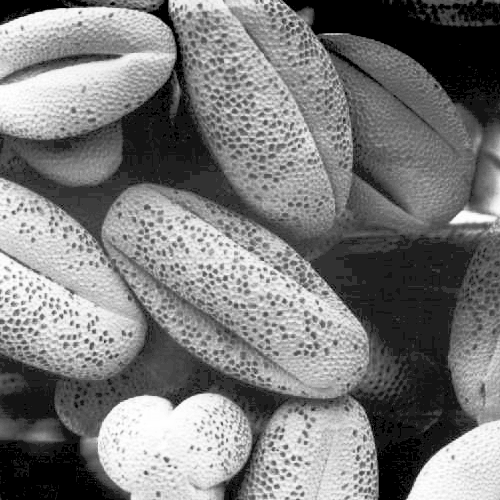

In [7]:
I_eq = ImageOps.equalize(I)
I_eq

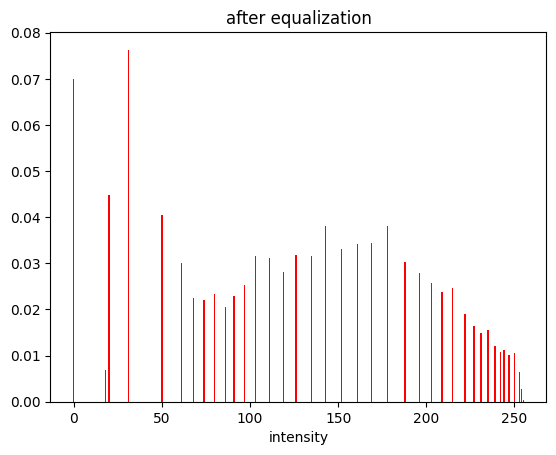

In [8]:
hist_eq = I_eq.histogram()
for n in range(0,len(hist_eq)):
  plt.bar(n,hist_eq[n]/N,color='r')

plt.title('after equalization')
plt.xlabel('intensity')
plt.show()

## 2. Local Histogram Equalization

(256, 256)


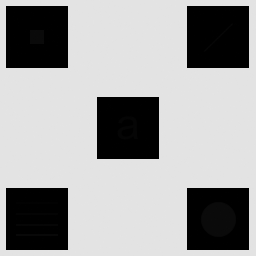

In [9]:
I = Image.open('hidden-symbols.tif')
print(I.size)
N = np.prod(I.size)
I

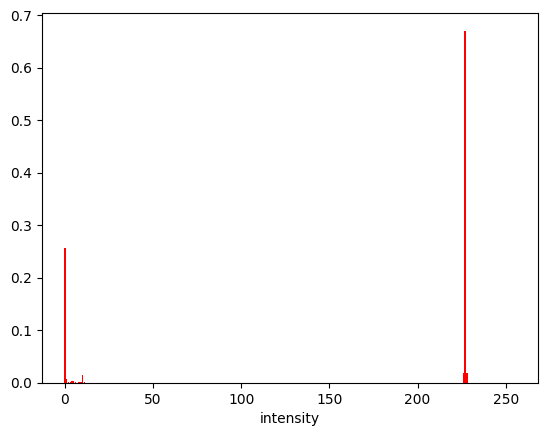

In [10]:
hist = I.histogram()
for n in range(0,len(hist)):
  plt.bar(n,hist[n]/N,color='r')

plt.xlabel('intensity')
plt.show()

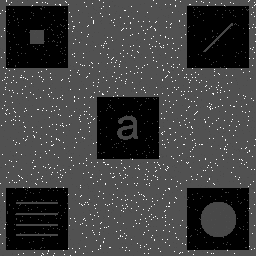

In [11]:
I_eq = ImageOps.equalize(I)
I_eq

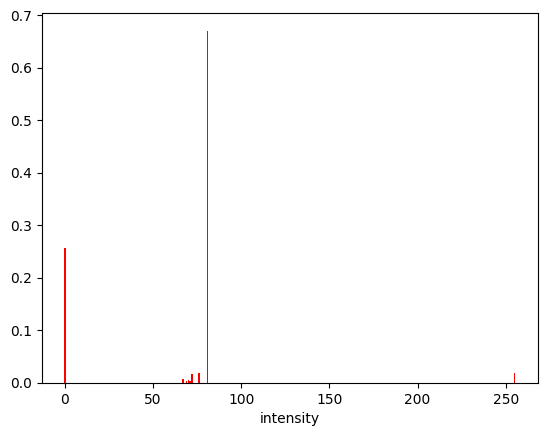

In [12]:
hist_eq = I_eq.histogram()
for n in range(0,len(hist_eq)):
  plt.bar(n,hist_eq[n]/N,color='r')

plt.xlabel('intensity')
plt.show()

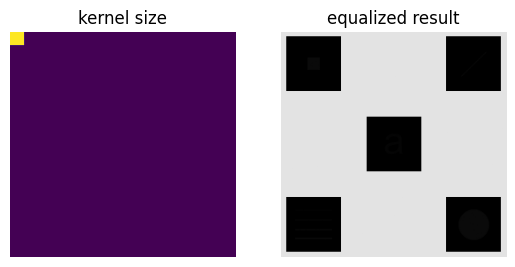

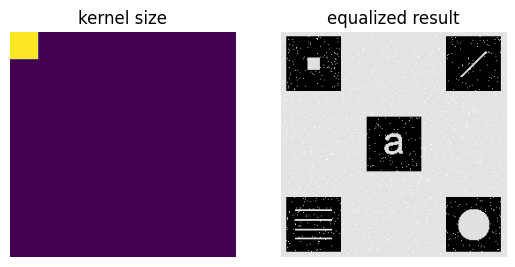

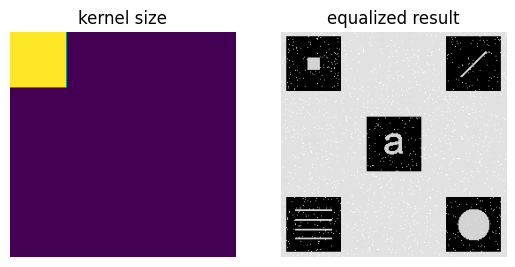

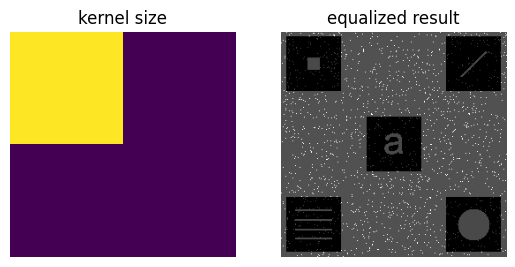

In [13]:
Kvals = [16,32,64,128]
for K in Kvals:
  tmp = np.zeros(I.size)
  tmp[:K,:K] = 255
  mask = Image.fromarray(np.uint8(tmp))
  plt.subplot(121)
  plt.imshow(mask)
  plt.axis('off')
  plt.title('kernel size')
  plt.subplot(122)
  I_eq = ImageOps.equalize(I,mask)
  plt.imshow(I_eq,cmap='gray',vmin=0,vmax=255)
  plt.axis('off')
  plt.title('equalized result')
  plt.show()

## 2-1. Using Histogram Statistics

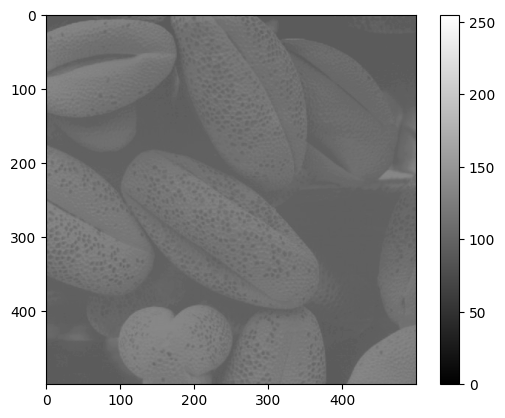

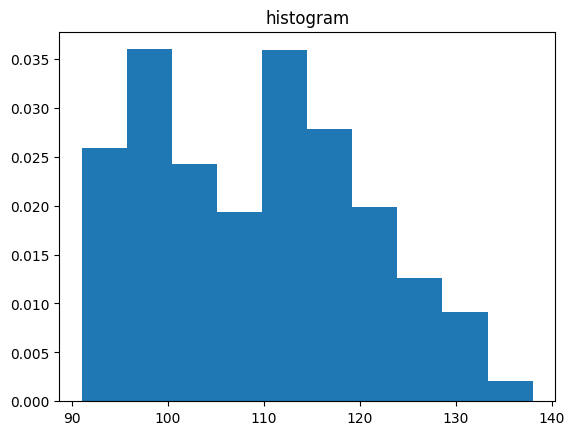

In [14]:
I = plt.imread('pollen-lowcontrast.tif')
f = np.array(I)
plt.figure(dpi=100)
plt.imshow(f,cmap='gray',vmin=0,vmax=255)
plt.colorbar()
plt.show()
plt.hist(f.ravel(),density=True)
plt.title('histogram')
plt.show()

In [15]:
f_min = np.min(f)
f_max = np.max(f)
f_mean = np.mean(f)
f_std = np.std(f)

print([f_min,f_max,f_mean,f_std])

[91, 138, 109.079976, 11.489510861626094]


In [16]:
fs = (f - f_mean)/f_std

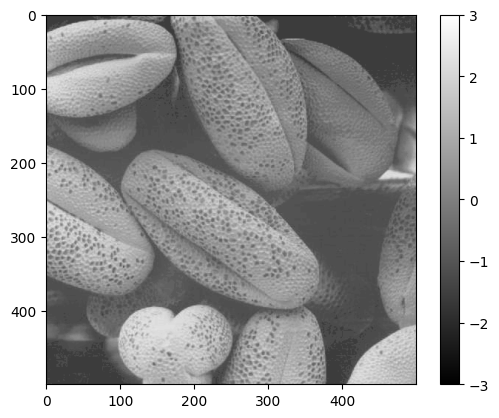

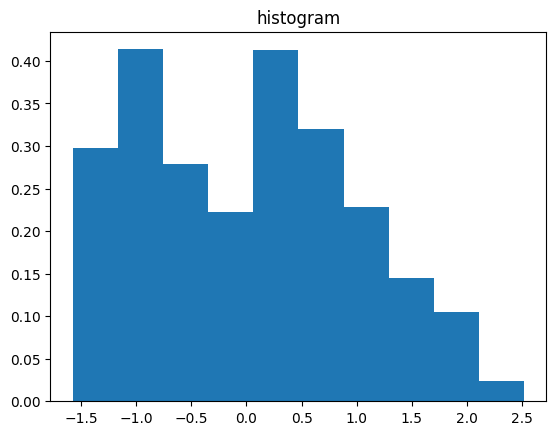

In [17]:
plt.figure(dpi=100)
plt.imshow(fs,cmap='gray',vmin=-3,vmax=3)
plt.colorbar()
plt.show()
plt.hist(fs.ravel(),density=True)
plt.title('histogram')
plt.show()

In [18]:
fn = (f-f_min)/(f_max - f_min)

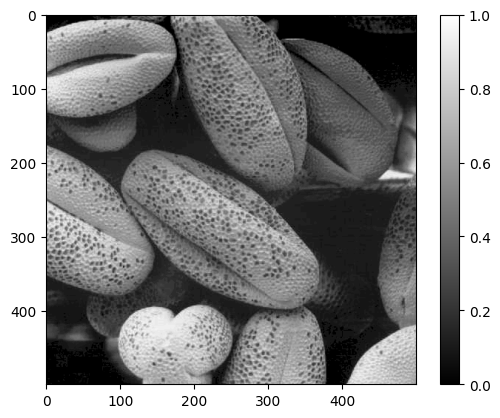

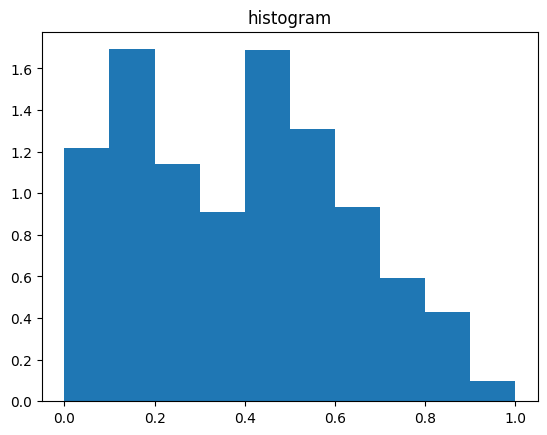

In [19]:
plt.figure(dpi=100)
plt.imshow(fn,cmap='gray')
plt.colorbar()
plt.show()
plt.hist(fn.ravel(),density=True)
plt.title('histogram')
plt.show()

## 3. Spatial Filtering

In [20]:
from PIL import ImageFilter
import scipy.signal as signal

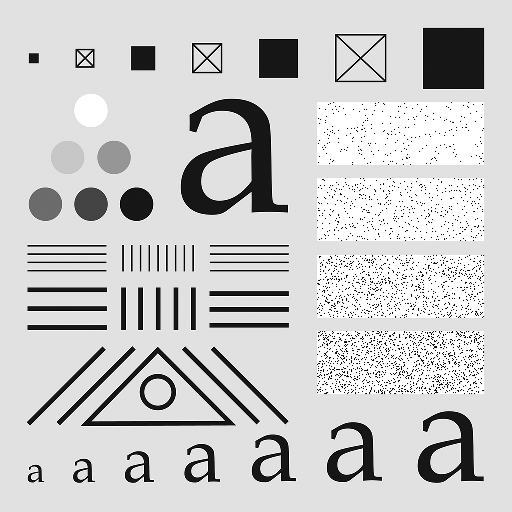

In [21]:
I = Image.open('testpattern512.tif')
I

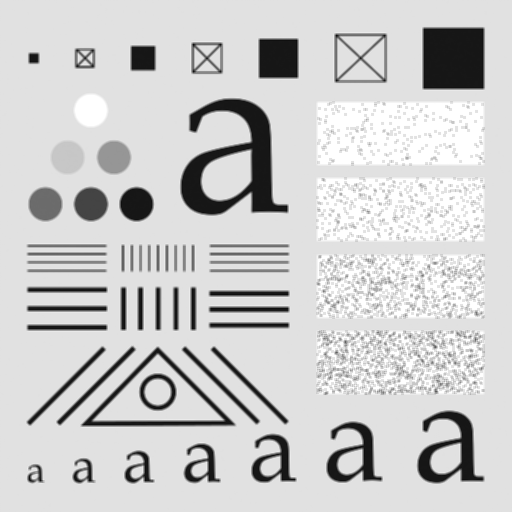

In [22]:
I.filter(ImageFilter.Kernel((3,3),(1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9),1,0))


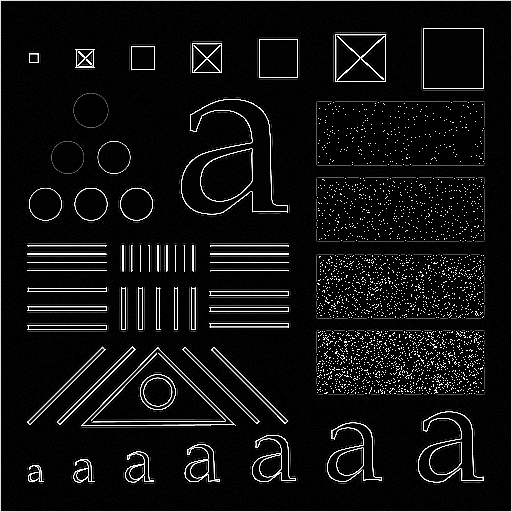

In [23]:
I.filter(ImageFilter.Kernel((3,3),(1,1,1,1,-8,1,1,1,1),1,0))

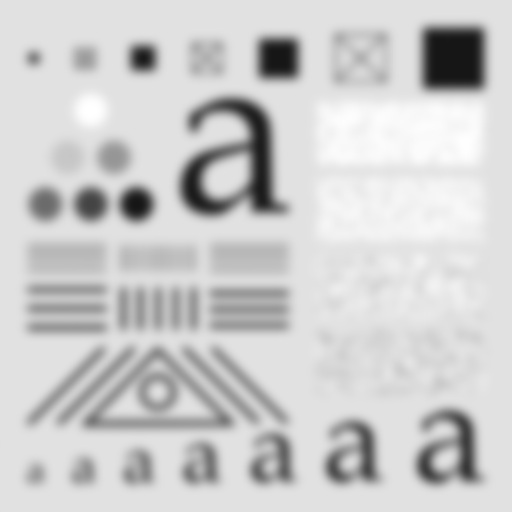

In [24]:
I.filter(ImageFilter.GaussianBlur(5))

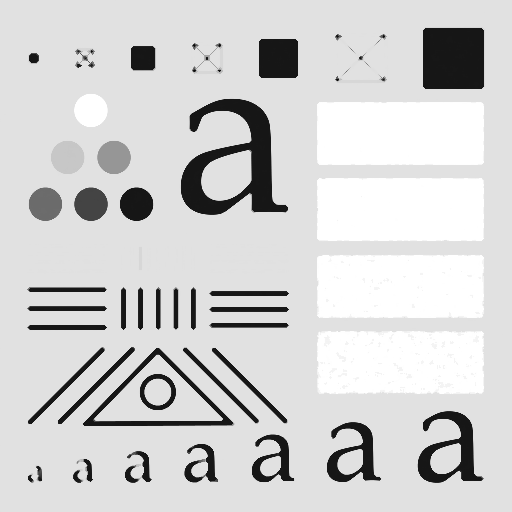

In [25]:
I.filter(ImageFilter.MedianFilter(5))

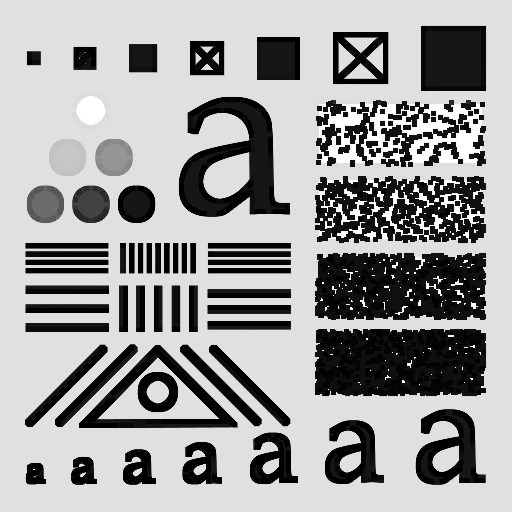

In [26]:
I.filter(ImageFilter.MinFilter(5))

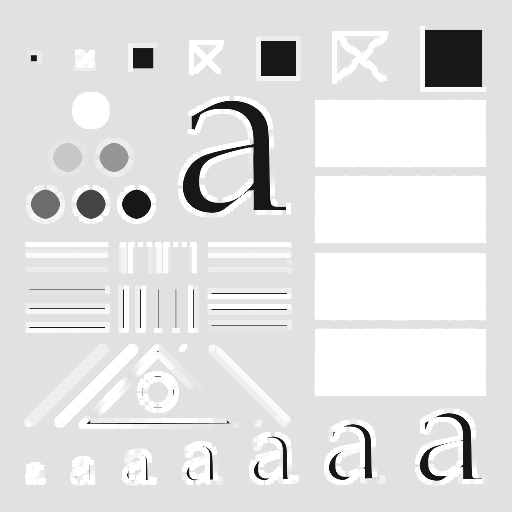

In [27]:
I.filter(ImageFilter.MaxFilter(5))

## 3-1. implementation of 2D convolution

In [28]:
f = np.array(I)

In [29]:
w = np.array( [[1,1,1],[1,1,1],[1,1,1]] )
print(w)
print(w.size)
w = w/(w.size)
print(w)

[[1 1 1]
 [1 1 1]
 [1 1 1]]
9
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [30]:
g = signal.convolve2d(f,w,mode='same')
g.shape

(512, 512)

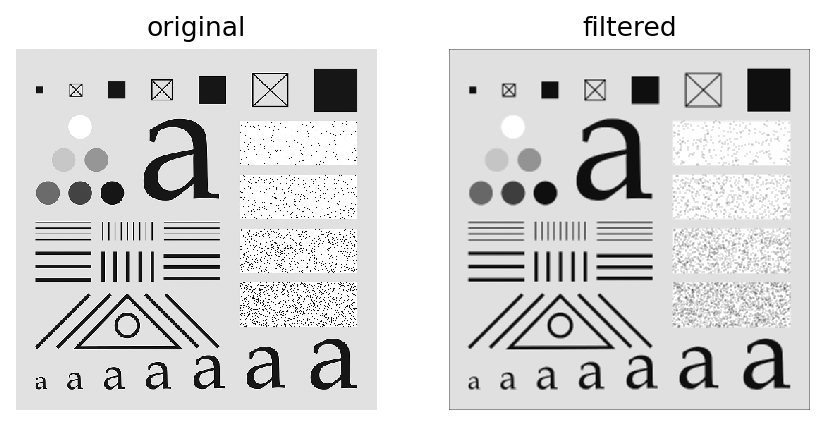

In [31]:

plt.figure(dpi=160)
plt.subplot(1,2,1)
plt.imshow(f,cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(g,cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('filtered')
plt.show()

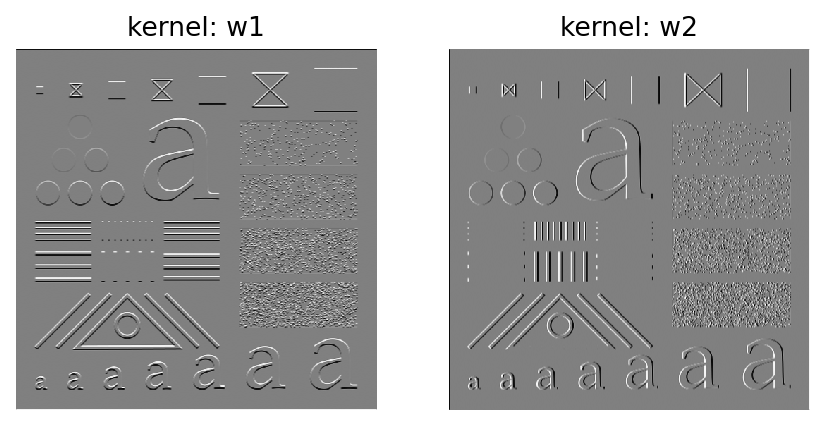

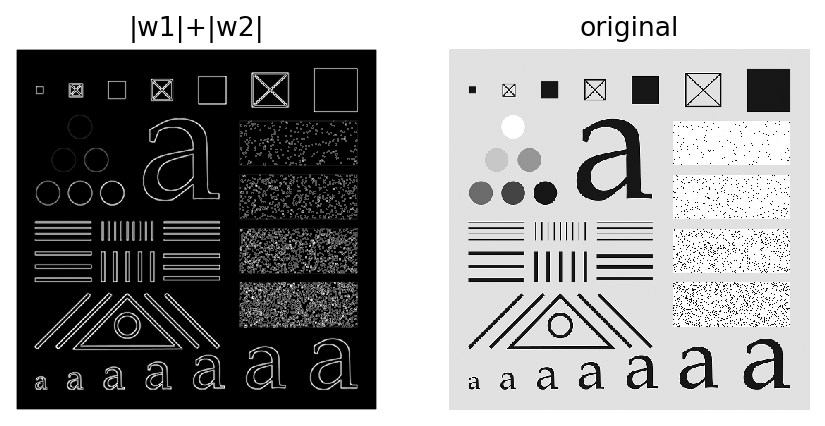

In [32]:
w1 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
w2 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
g1 = signal.convolve2d(f,w1,mode='same')
g2 = signal.convolve2d(f,w2,mode='same')
plt.figure(dpi=160)
plt.subplot(1,2,1)
plt.imshow(g1,cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('kernel: w1')
plt.subplot(1,2,2)
plt.imshow(g2,cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('kernel: w2')
plt.show()

plt.figure(dpi=160)
plt.subplot(1,2,1)
plt.imshow(np.abs(g2)+np.abs(g1),cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('|w1|+|w2|')
plt.subplot(1,2,2)
plt.imshow(f,cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('original')
plt.show()